## Support Vector Machine implementation on 220 Band AVIRIS Hyperspectral Image of Indian Pine Test Site 3 

## Steps :
## --> 1. Load Dataset 
## --> 2. Data Preprocessing (Converting from 3D to 2D)
## --> 3. Feature Extraction (PCA) / Component Selection (16)
## --> 4. Data Cleaning (Removing 0 class) 
## --> 5. Normalization (Z Score Normalization)
## --> 6. Train Test Splitting (70% Train , 30% Test)
## --> 7. Apply Grid search on train dataset and Find best values for hyperparameter
## --> 8. Find Training Accuracy
## --> 9. Testing Accuracy

# 1. Load Dataset

### Import Library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline

### read .lan file

In [2]:
#import the package
from spectral import *

In [3]:
data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan')

In [4]:
data

	Data Source:   'D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3C.lan'
	# Rows:            145
	# Samples:         145
	# Bands:           220
	Interleave:        BIL
	Quantization:  16 bits
	Data format:     int16

In [5]:
data.shape

(145, 145, 220)

In [6]:
data[:,:,:]

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [3348, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [3341, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[3344, 4388, 4334, ..., 1030, 1006, 1015],
        [3515, 4264, 4592, ..., 1039, 1015, 1020],
        [3518, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [3512, 4268, 4597, ..., 1019, 1016, 1010]],

       [[3512, 4146, 4416, ..., 1029, 1025, 1010],
        [3344, 4389, 4416, ..., 1021, 1011, 1000],
        [3512, 4273, 4420, ..., 1033, 1010, 1014],
        ...,
        [3341, 4266, 4509, ..., 1025, 1010, 1005],
        [3344, 4262, 4496, ..., 1029, 1020, 1005],
        [3510, 4142, 4230, ..., 1025, 1011, 1010]],

       ...,

       [[3324, 3728, 400

### read ground truth data

In [7]:
ground_truth_data = open_image('D:\Academic Thesis Papers\Thesis Report 9\sample-data-master\92AV3GT.GIS').read_band(0)

In [8]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

# 2. Data Preprocessing (Converting from 3D to 2D)

### Prepare dataset by making the band number as features and pixel number as rows

In [9]:
dictionary = dict()
value = list()

for z in range(220):
    count = z + 1
    key = 'band_' + str(count)
    
    for x in range(145):
        for y in range(145):
            value.append(data[x,y,z])
    
    dictionary[key] = value
    value = list()
            
dictionary

{'band_1': [3172,
  3348,
  3687,
  3517,
  3514,
  3343,
  3343,
  3343,
  3346,
  3522,
  3858,
  3514,
  3343,
  3343,
  3343,
  3343,
  3343,
  3343,
  3346,
  3514,
  3341,
  3172,
  3343,
  3341,
  3167,
  3004,
  3514,
  3341,
  3170,
  3170,
  3170,
  3167,
  3002,
  3338,
  2996,
  3004,
  3514,
  3343,
  3346,
  3517,
  3517,
  3514,
  3348,
  3687,
  3514,
  3346,
  3514,
  3343,
  3346,
  3514,
  3343,
  3343,
  3343,
  3348,
  3687,
  3511,
  3172,
  3346,
  3514,
  3346,
  3519,
  3690,
  3690,
  3690,
  3693,
  3858,
  3517,
  3517,
  3511,
  3170,
  3175,
  3514,
  3343,
  3343,
  3341,
  3172,
  3341,
  3167,
  2999,
  3170,
  3162,
  2657,
  3170,
  3167,
  3002,
  3341,
  3172,
  3338,
  2999,
  3170,
  3167,
  2996,
  2999,
  3167,
  3002,
  3341,
  3178,
  3690,
  3687,
  3517,
  3517,
  3514,
  3343,
  3346,
  3511,
  3175,
  3514,
  3343,
  3343,
  3343,
  3341,
  3172,
  3343,
  3346,
  3511,
  3172,
  3341,
  3170,
  3178,
  3685,
  3343,
  3341,
  3175,
  3517

In [10]:
dictionary['band_1']

[3172,
 3348,
 3687,
 3517,
 3514,
 3343,
 3343,
 3343,
 3346,
 3522,
 3858,
 3514,
 3343,
 3343,
 3343,
 3343,
 3343,
 3343,
 3346,
 3514,
 3341,
 3172,
 3343,
 3341,
 3167,
 3004,
 3514,
 3341,
 3170,
 3170,
 3170,
 3167,
 3002,
 3338,
 2996,
 3004,
 3514,
 3343,
 3346,
 3517,
 3517,
 3514,
 3348,
 3687,
 3514,
 3346,
 3514,
 3343,
 3346,
 3514,
 3343,
 3343,
 3343,
 3348,
 3687,
 3511,
 3172,
 3346,
 3514,
 3346,
 3519,
 3690,
 3690,
 3690,
 3693,
 3858,
 3517,
 3517,
 3511,
 3170,
 3175,
 3514,
 3343,
 3343,
 3341,
 3172,
 3341,
 3167,
 2999,
 3170,
 3162,
 2657,
 3170,
 3167,
 3002,
 3341,
 3172,
 3338,
 2999,
 3170,
 3167,
 2996,
 2999,
 3167,
 3002,
 3341,
 3178,
 3690,
 3687,
 3517,
 3517,
 3514,
 3343,
 3346,
 3511,
 3175,
 3514,
 3343,
 3343,
 3343,
 3341,
 3172,
 3343,
 3346,
 3511,
 3172,
 3341,
 3170,
 3178,
 3685,
 3343,
 3341,
 3175,
 3517,
 3517,
 3517,
 3517,
 3519,
 3690,
 3693,
 3858,
 3519,
 3687,
 3522,
 3861,
 3687,
 3517,
 3514,
 3346,
 3514,
 3338,
 3002,
 3341,

### Prepare ground truth data as target data

In [11]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [12]:
ground_truth_data.shape

(145, 145)

In [13]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i,j] not in diff:
            diff[ground_truth_data[i,j]] = 1
        else:
            diff[ground_truth_data[i,j]] = diff[ground_truth_data[i,j]] + 1
diff

{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

NB : So there are total 17 classes in this ground truth data

In [14]:
target = ground_truth_data.reshape(21025,)
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [15]:
print(target.shape)
print(target.ndim)

(21025,)
1


### making df

In [16]:
df = pd.DataFrame(dictionary)

In [17]:
df

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0        3172    4142    4506    4279    4782    5048    5213    5106    5053   
1        3348    4266    4502    4426    4853    5249    5352    5353    5347   
2        3687    4266    4421    4498    5019    5293    5438    5427    5383   
3        3517    4258    4603    4493    4958    5234    5417    5355    5349   
4        3514    4018    4675    4417    4886    5117    5215    5096    5098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
21020    3329    3987    4011    4023    4201    4377    4418    4248    4180   
21021    3494    4104    4024    3880    4210    4377    4413    4174    4229   
21022    3153    3864    4282    3889    4310    4372    4375    4208    4096   
21023    3155    4104    4109    4027    4139    4318    4413    4174    4140   
21024    3323    3860    4197    3952    4148    4279    4375    4225    3988   

       band_10  ...  band_211  band_212  band_213  band_214  band_215  \
0         4750  ...      1094      1090      1112      1090      1062   
1         5065  ...      1108      1104      1117      1091      1079   
2         5132  ...      1111      1114      1114      1100      1065   
3         5096  ...      1122      1108      1109      1109      1071   
4         4834  ...      1110      1107      1112      1094      1072   
...        ...  ...       ...       ...       ...       ...       ...   
21020     3838  ...      1013      1012      1018      1015      1011   
21021     3900  ...      1012      1014      1012      1024       998   
21022     3878  ...      1016      1015      1016      1021      1008   
21023     3933  ...      1005      1011      1008      1012      1014   
21024     3866  ...      1018      1014      1007      1015      1002   

       band_216  band_217  band_218  band_219  band_220  
0          1069      1057      1020      1020      1005  
1          1085      1064      1029      1020      1000  
2          1092      1061      1030      1016      1009  
3          1088      1060      1030      1006      1005  
4          1087      1052      1034      1019      1019  
...         ...       ...       ...       ...       ...  
21020      1001      1000      1009      1008      1009  
21021      1010      1006      1000      1000      1004  
21022      1019      1003      1008      1000      1009  
21023      1007      1011      1005      1003      1004  
21024      1010      1007      1004      1000      1000  

[21025 rows x 220 columns]

# 3. Feature Extraction (PCA) / Component Selection

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=16)
x_lda = lda.fit_transform(df,target)
x_lda

# from sklearn.decomposition import PCA
# pca = PCA(n_components=16)
# pca.fit(df)
# x_pca = pca.transform(df)
# x_pca

array([[ 1.85072789,  0.36887991,  1.39746377, ...,  2.01703231,
         0.71670167,  0.14665114],
       [ 1.98482028,  0.61773045,  1.45120736, ...,  1.01522907,
        -1.15907058,  0.71115858],
       [ 1.85430441,  1.70487691,  2.04871074, ..., -1.13239053,
         0.89880882,  0.09906681],
       ...,
       [-2.18165416,  0.48585756,  2.43893801, ...,  1.46781769,
        -0.19504958, -0.57496552],
       [-1.62341166,  0.33138148,  1.88238732, ...,  0.82757571,
        -1.20168322, -0.94125223],
       [-1.74471081, -0.0156792 ,  2.53549607, ...,  1.21449386,
         0.72198291,  0.43356714]])

In [19]:
lda.explained_variance_ratio_

array([0.33782338, 0.21298331, 0.08923435, 0.06843646, 0.06743067,
       0.06419124, 0.04702054, 0.03874696, 0.02078831, 0.01576096,
       0.01140257, 0.01074385, 0.00604365, 0.00406095, 0.00285507,
       0.00247772])

In [20]:
cumulative_variance = np.cumsum(lda.explained_variance_ratio_)
cumulative_variance

array([0.33782338, 0.55080669, 0.64004105, 0.70847751, 0.77590818,
       0.84009941, 0.88711995, 0.92586691, 0.94665522, 0.96241617,
       0.97381875, 0.9845626 , 0.99060625, 0.9946672 , 0.99752228,
       1.        ])

In [21]:
print(df.shape)
print(x_lda.shape)

(21025, 220)
(21025, 16)


In [22]:
pd.DataFrame(data=x_lda)

0         1         2         3         4         5         6   \
0      1.850728  0.368880  1.397464  1.668802 -1.958817 -0.614630  0.513065   
1      1.984820  0.617730  1.451207  1.597145 -1.805473 -1.529416  0.916081   
2      1.854304  1.704877  2.048711  2.034740 -1.642547 -0.666987 -0.122127   
3      1.619240  1.661817  1.966164  1.352030 -2.324288 -0.293763 -0.537024   
4      1.972141  0.477323  1.137561  1.773989 -1.122231 -0.439754  0.147507   
...         ...       ...       ...       ...       ...       ...       ...   
21020 -2.121649  0.618884  1.646448  0.117690  1.908170  1.500925  1.508905   
21021 -2.064122  0.385558  2.574214 -0.252015  1.950006  0.586890  1.838700   
21022 -2.181654  0.485858  2.438938 -0.128249  1.495485  1.285781  0.395153   
21023 -1.623412  0.331381  1.882387  0.156403  2.204416  0.066445  0.358955   
21024 -1.744711 -0.015679  2.535496 -0.193510  1.440982 -0.098145  0.725569   

             7         8         9         10        11        12        13  \
0      0.528178  0.345244  0.087402 -1.700555 -0.645562  1.518461  2.017032   
1      0.486888  0.114040 -0.092982  0.194785 -1.716130  1.819018  1.015229   
2      0.503885  1.799741 -0.271269  0.851452 -1.818683  0.596689 -1.132391   
3      0.723169  1.731484  0.657047  2.208619 -1.560119 -0.139349 -0.025169   
4      1.126049  0.166400  1.405533  2.068682 -1.144269 -1.057332 -0.939911   
...         ...       ...       ...       ...       ...       ...       ...   
21020  0.118575 -0.676212  0.622489 -0.644718  0.040296  0.190854 -0.834430   
21021 -0.069370 -0.798649  0.177156 -0.643856  0.678484 -0.034184  0.592606   
21022 -0.556975 -0.871477  0.119303 -0.185736  0.499576 -1.690804  1.467818   
21023 -0.009071 -0.450403 -0.609766 -0.969302  0.651075  0.208603  0.827576   
21024 -0.625390 -1.027508  0.005366 -1.905386  1.345393  1.837466  1.214494   

             14        15  
0      0.716702  0.146651  
1     -1.159071  0.711159  
2      0.898809  0.099067  
3      1.037144  1.295961  
4      0.616393  0.750848  
...         ...       ...  
21020  1.434502  0.558784  
21021  1.629479 -0.222623  
21022 -0.195050 -0.574966  
21023 -1.201683 -0.941252  
21024  0.721983  0.433567  

[21025 rows x 16 columns]

In [23]:
df = pd.DataFrame(data=x_lda)
df

0         1         2         3         4         5         6   \
0      1.850728  0.368880  1.397464  1.668802 -1.958817 -0.614630  0.513065   
1      1.984820  0.617730  1.451207  1.597145 -1.805473 -1.529416  0.916081   
2      1.854304  1.704877  2.048711  2.034740 -1.642547 -0.666987 -0.122127   
3      1.619240  1.661817  1.966164  1.352030 -2.324288 -0.293763 -0.537024   
4      1.972141  0.477323  1.137561  1.773989 -1.122231 -0.439754  0.147507   
...         ...       ...       ...       ...       ...       ...       ...   
21020 -2.121649  0.618884  1.646448  0.117690  1.908170  1.500925  1.508905   
21021 -2.064122  0.385558  2.574214 -0.252015  1.950006  0.586890  1.838700   
21022 -2.181654  0.485858  2.438938 -0.128249  1.495485  1.285781  0.395153   
21023 -1.623412  0.331381  1.882387  0.156403  2.204416  0.066445  0.358955   
21024 -1.744711 -0.015679  2.535496 -0.193510  1.440982 -0.098145  0.725569   

             7         8         9         10        11        12        13  \
0      0.528178  0.345244  0.087402 -1.700555 -0.645562  1.518461  2.017032   
1      0.486888  0.114040 -0.092982  0.194785 -1.716130  1.819018  1.015229   
2      0.503885  1.799741 -0.271269  0.851452 -1.818683  0.596689 -1.132391   
3      0.723169  1.731484  0.657047  2.208619 -1.560119 -0.139349 -0.025169   
4      1.126049  0.166400  1.405533  2.068682 -1.144269 -1.057332 -0.939911   
...         ...       ...       ...       ...       ...       ...       ...   
21020  0.118575 -0.676212  0.622489 -0.644718  0.040296  0.190854 -0.834430   
21021 -0.069370 -0.798649  0.177156 -0.643856  0.678484 -0.034184  0.592606   
21022 -0.556975 -0.871477  0.119303 -0.185736  0.499576 -1.690804  1.467818   
21023 -0.009071 -0.450403 -0.609766 -0.969302  0.651075  0.208603  0.827576   
21024 -0.625390 -1.027508  0.005366 -1.905386  1.345393  1.837466  1.214494   

             14        15  
0      0.716702  0.146651  
1     -1.159071  0.711159  
2      0.898809  0.099067  
3      1.037144  1.295961  
4      0.616393  0.750848  
...         ...       ...  
21020  1.434502  0.558784  
21021  1.629479 -0.222623  
21022 -0.195050 -0.574966  
21023 -1.201683 -0.941252  
21024  0.721983  0.433567  

[21025 rows x 16 columns]

In [24]:
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [25]:
target.shape

(21025,)

In [26]:
df['target'] = target
df

0         1         2         3         4         5         6  \
0      1.850728  0.368880  1.397464  1.668802 -1.958817 -0.614630  0.513065   
1      1.984820  0.617730  1.451207  1.597145 -1.805473 -1.529416  0.916081   
2      1.854304  1.704877  2.048711  2.034740 -1.642547 -0.666987 -0.122127   
3      1.619240  1.661817  1.966164  1.352030 -2.324288 -0.293763 -0.537024   
4      1.972141  0.477323  1.137561  1.773989 -1.122231 -0.439754  0.147507   
...         ...       ...       ...       ...       ...       ...       ...   
21020 -2.121649  0.618884  1.646448  0.117690  1.908170  1.500925  1.508905   
21021 -2.064122  0.385558  2.574214 -0.252015  1.950006  0.586890  1.838700   
21022 -2.181654  0.485858  2.438938 -0.128249  1.495485  1.285781  0.395153   
21023 -1.623412  0.331381  1.882387  0.156403  2.204416  0.066445  0.358955   
21024 -1.744711 -0.015679  2.535496 -0.193510  1.440982 -0.098145  0.725569   

              7         8         9        10        11        12        13  \
0      0.528178  0.345244  0.087402 -1.700555 -0.645562  1.518461  2.017032   
1      0.486888  0.114040 -0.092982  0.194785 -1.716130  1.819018  1.015229   
2      0.503885  1.799741 -0.271269  0.851452 -1.818683  0.596689 -1.132391   
3      0.723169  1.731484  0.657047  2.208619 -1.560119 -0.139349 -0.025169   
4      1.126049  0.166400  1.405533  2.068682 -1.144269 -1.057332 -0.939911   
...         ...       ...       ...       ...       ...       ...       ...   
21020  0.118575 -0.676212  0.622489 -0.644718  0.040296  0.190854 -0.834430   
21021 -0.069370 -0.798649  0.177156 -0.643856  0.678484 -0.034184  0.592606   
21022 -0.556975 -0.871477  0.119303 -0.185736  0.499576 -1.690804  1.467818   
21023 -0.009071 -0.450403 -0.609766 -0.969302  0.651075  0.208603  0.827576   
21024 -0.625390 -1.027508  0.005366 -1.905386  1.345393  1.837466  1.214494   

             14        15  target  
0      0.716702  0.146651       3  
1     -1.159071  0.711159       3  
2      0.898809  0.099067       3  
3      1.037144  1.295961       3  
4      0.616393  0.750848       3  
...         ...       ...     ...  
21020  1.434502  0.558784       0  
21021  1.629479 -0.222623       0  
21022 -0.195050 -0.574966       0  
21023 -1.201683 -0.941252       0  
21024  0.721983  0.433567       0  

[21025 rows x 17 columns]

# 4. Data Cleaning (Removing 0 class) 

In [27]:
df = df[df['target']!=0]

In [28]:
df

0         1         2         3         4         5         6  \
0      1.850728  0.368880  1.397464  1.668802 -1.958817 -0.614630  0.513065   
1      1.984820  0.617730  1.451207  1.597145 -1.805473 -1.529416  0.916081   
2      1.854304  1.704877  2.048711  2.034740 -1.642547 -0.666987 -0.122127   
3      1.619240  1.661817  1.966164  1.352030 -2.324288 -0.293763 -0.537024   
4      1.972141  0.477323  1.137561  1.773989 -1.122231 -0.439754  0.147507   
...         ...       ...       ...       ...       ...       ...       ...   
20763  0.691269 -0.528765 -1.048022  0.273063  0.126651 -1.034462 -0.191270   
20764  1.555603 -0.229794 -0.363912 -0.415173  0.292620 -0.253893 -0.897839   
20765  2.042328  0.387369 -0.216900 -0.504165  0.874813 -0.375049 -1.144800   
20766  2.244700  0.596306 -1.162556 -0.203832  0.932658  0.364676 -1.509813   
20767  1.820320  0.323735 -0.689915 -1.283598  0.729174  0.755798 -1.055231   

              7         8         9        10        11        12        13  \
0      0.528178  0.345244  0.087402 -1.700555 -0.645562  1.518461  2.017032   
1      0.486888  0.114040 -0.092982  0.194785 -1.716130  1.819018  1.015229   
2      0.503885  1.799741 -0.271269  0.851452 -1.818683  0.596689 -1.132391   
3      0.723169  1.731484  0.657047  2.208619 -1.560119 -0.139349 -0.025169   
4      1.126049  0.166400  1.405533  2.068682 -1.144269 -1.057332 -0.939911   
...         ...       ...       ...       ...       ...       ...       ...   
20763  1.730840  0.174260 -0.436830 -0.748240  0.262138  1.228773  1.111421   
20764  0.252841 -1.013267 -1.836714 -1.507425 -0.882710 -0.043271 -0.160979   
20765 -0.530725 -0.501041 -1.722367 -0.848567 -0.539250 -0.092213 -0.349741   
20766 -0.794581  0.389569 -0.852388  0.481035 -0.233981  0.767809 -1.393243   
20767 -0.268166  0.219175 -1.654353 -0.546359 -1.055029 -0.325879 -0.631116   

             14        15  target  
0      0.716702  0.146651       3  
1     -1.159071  0.711159       3  
2      0.898809  0.099067       3  
3      1.037144  1.295961       3  
4      0.616393  0.750848       3  
...         ...       ...     ...  
20763 -1.426184  0.943456      10  
20764  0.096392  1.242838      10  
20765 -1.042034  0.189789      10  
20766 -1.411868 -1.517249      10  
20767  0.168140 -0.340612      10  

[10366 rows x 17 columns]

In [29]:
x = df[df.columns[:-1]]
x

0         1         2         3         4         5         6  \
0      1.850728  0.368880  1.397464  1.668802 -1.958817 -0.614630  0.513065   
1      1.984820  0.617730  1.451207  1.597145 -1.805473 -1.529416  0.916081   
2      1.854304  1.704877  2.048711  2.034740 -1.642547 -0.666987 -0.122127   
3      1.619240  1.661817  1.966164  1.352030 -2.324288 -0.293763 -0.537024   
4      1.972141  0.477323  1.137561  1.773989 -1.122231 -0.439754  0.147507   
...         ...       ...       ...       ...       ...       ...       ...   
20763  0.691269 -0.528765 -1.048022  0.273063  0.126651 -1.034462 -0.191270   
20764  1.555603 -0.229794 -0.363912 -0.415173  0.292620 -0.253893 -0.897839   
20765  2.042328  0.387369 -0.216900 -0.504165  0.874813 -0.375049 -1.144800   
20766  2.244700  0.596306 -1.162556 -0.203832  0.932658  0.364676 -1.509813   
20767  1.820320  0.323735 -0.689915 -1.283598  0.729174  0.755798 -1.055231   

              7         8         9        10        11        12        13  \
0      0.528178  0.345244  0.087402 -1.700555 -0.645562  1.518461  2.017032   
1      0.486888  0.114040 -0.092982  0.194785 -1.716130  1.819018  1.015229   
2      0.503885  1.799741 -0.271269  0.851452 -1.818683  0.596689 -1.132391   
3      0.723169  1.731484  0.657047  2.208619 -1.560119 -0.139349 -0.025169   
4      1.126049  0.166400  1.405533  2.068682 -1.144269 -1.057332 -0.939911   
...         ...       ...       ...       ...       ...       ...       ...   
20763  1.730840  0.174260 -0.436830 -0.748240  0.262138  1.228773  1.111421   
20764  0.252841 -1.013267 -1.836714 -1.507425 -0.882710 -0.043271 -0.160979   
20765 -0.530725 -0.501041 -1.722367 -0.848567 -0.539250 -0.092213 -0.349741   
20766 -0.794581  0.389569 -0.852388  0.481035 -0.233981  0.767809 -1.393243   
20767 -0.268166  0.219175 -1.654353 -0.546359 -1.055029 -0.325879 -0.631116   

             14        15  
0      0.716702  0.146651  
1     -1.159071  0.711159  
2      0.898809  0.099067  
3      1.037144  1.295961  
4      0.616393  0.750848  
...         ...       ...  
20763 -1.426184  0.943456  
20764  0.096392  1.242838  
20765 -1.042034  0.189789  
20766 -1.411868 -1.517249  
20767  0.168140 -0.340612  

[10366 rows x 16 columns]

In [30]:
y = df['target']
y

0         3
1         3
2         3
3         3
4         3
         ..
20763    10
20764    10
20765    10
20766    10
20767    10
Name: target, Length: 10366, dtype: int8

# 5. Normalization (Z Score Normalization)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(x)
standardized_data

array([[ 0.49295913,  0.32868331,  0.98008141, ...,  2.03374048,
         0.72289287,  0.16224408],
       [ 0.56383032,  0.462363  ,  1.01840159, ...,  1.0277792 ,
        -1.16674657,  0.72337614],
       [ 0.49484941,  1.04636574,  1.44443262, ..., -1.1287542 ,
         0.90634629,  0.11494427],
       ...,
       [ 0.59422446,  0.33861559, -0.1709898 , ..., -0.34285629,
        -1.04884426,  0.20512383],
       [ 0.70118323,  0.45085385, -0.84526011, ..., -1.39068924,
        -1.42141316, -1.49170705],
       [ 0.47688798,  0.30443208, -0.50825816, ..., -0.62539877,
         0.1702761 , -0.3221059 ]])

In [32]:
x = pd.DataFrame(data = standardized_data)
x

0         1         2         3         4         5         6   \
0      0.492959  0.328683  0.980081  1.258172 -1.601728 -0.416991  0.293231   
1      0.563830  0.462363  1.018402  1.204822 -1.482809 -1.118231  0.636671   
2      0.494849  1.046366  1.444433  1.530618 -1.356459 -0.457126 -0.248065   
3      0.370612  1.023235  1.385576  1.022330 -1.885153 -0.171026 -0.601631   
4      0.557129  0.386938  0.794766  1.336485 -0.952952 -0.282938 -0.018289   
...         ...       ...       ...       ...       ...       ...       ...   
10361 -0.119844 -0.153521 -0.763595  0.219023  0.015562 -0.738818 -0.306987   
10362  0.336978  0.007083 -0.275812 -0.293379  0.144271 -0.140463 -0.909109   
10363  0.594224  0.338616 -0.170990 -0.359635  0.595765 -0.233337 -1.119563   
10364  0.701183  0.450854 -0.845260 -0.136033  0.640624  0.333708 -1.430619   
10365  0.476888  0.304432 -0.508258 -0.939934  0.482822  0.633527 -1.043234   

             7         8         9         10        11        12        13  \
0      0.459512  0.494296  0.202506 -1.770097 -0.519406  1.478888  2.033740   
1      0.425034  0.255239  0.032500  0.111435 -1.560831  1.772007  1.027779   
2      0.439227  1.998201 -0.135531  0.763318 -1.660592  0.579926 -1.128754   
3      0.622327  1.927625  0.739382  2.110599 -1.409067 -0.137898 -0.016937   
4      0.958728  0.309378  1.444809  1.971681 -1.004537 -1.033166 -0.935475   
...         ...       ...       ...       ...       ...       ...       ...   
10361  1.463724  0.317504 -0.291568 -0.824720  0.363585  1.196369  1.124370   
10362  0.229607 -0.910362 -1.610919 -1.578375 -0.750098 -0.044198 -0.153311   
10363 -0.424663 -0.380736 -1.503150 -0.924316 -0.415988 -0.091929 -0.342856   
10364 -0.644981  0.540127 -0.683220  0.395600 -0.119029  0.746811 -1.390689   
10365 -0.205429  0.363945 -1.439050 -0.624309 -0.917726 -0.319813 -0.625399   

             14        15  
0      0.722893  0.162244  
1     -1.166747  0.723376  
2      0.906346  0.114944  
3      1.045704  1.304682  
4      0.621843  0.762829  
...         ...       ...  
10361 -1.435835  0.954285  
10362  0.097998  1.251877  
10363 -1.048844  0.205124  
10364 -1.421413 -1.491707  
10365  0.170276 -0.322106  

[10366 rows x 16 columns]

In [33]:
name = list()
for i in range (x.shape[1]):
    name.append('PC'+str(i+1))
name

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16']

In [34]:
x.columns = name
x

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      0.492959  0.328683  0.980081  1.258172 -1.601728 -0.416991  0.293231   
1      0.563830  0.462363  1.018402  1.204822 -1.482809 -1.118231  0.636671   
2      0.494849  1.046366  1.444433  1.530618 -1.356459 -0.457126 -0.248065   
3      0.370612  1.023235  1.385576  1.022330 -1.885153 -0.171026 -0.601631   
4      0.557129  0.386938  0.794766  1.336485 -0.952952 -0.282938 -0.018289   
...         ...       ...       ...       ...       ...       ...       ...   
10361 -0.119844 -0.153521 -0.763595  0.219023  0.015562 -0.738818 -0.306987   
10362  0.336978  0.007083 -0.275812 -0.293379  0.144271 -0.140463 -0.909109   
10363  0.594224  0.338616 -0.170990 -0.359635  0.595765 -0.233337 -1.119563   
10364  0.701183  0.450854 -0.845260 -0.136033  0.640624  0.333708 -1.430619   
10365  0.476888  0.304432 -0.508258 -0.939934  0.482822  0.633527 -1.043234   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0      0.459512  0.494296  0.202506 -1.770097 -0.519406  1.478888  2.033740   
1      0.425034  0.255239  0.032500  0.111435 -1.560831  1.772007  1.027779   
2      0.439227  1.998201 -0.135531  0.763318 -1.660592  0.579926 -1.128754   
3      0.622327  1.927625  0.739382  2.110599 -1.409067 -0.137898 -0.016937   
4      0.958728  0.309378  1.444809  1.971681 -1.004537 -1.033166 -0.935475   
...         ...       ...       ...       ...       ...       ...       ...   
10361  1.463724  0.317504 -0.291568 -0.824720  0.363585  1.196369  1.124370   
10362  0.229607 -0.910362 -1.610919 -1.578375 -0.750098 -0.044198 -0.153311   
10363 -0.424663 -0.380736 -1.503150 -0.924316 -0.415988 -0.091929 -0.342856   
10364 -0.644981  0.540127 -0.683220  0.395600 -0.119029  0.746811 -1.390689   
10365 -0.205429  0.363945 -1.439050 -0.624309 -0.917726 -0.319813 -0.625399   

           PC15      PC16  
0      0.722893  0.162244  
1     -1.166747  0.723376  
2      0.906346  0.114944  
3      1.045704  1.304682  
4      0.621843  0.762829  
...         ...       ...  
10361 -1.435835  0.954285  
10362  0.097998  1.251877  
10363 -1.048844  0.205124  
10364 -1.421413 -1.491707  
10365  0.170276 -0.322106  

[10366 rows x 16 columns]

# 6. Train Test Splitting (70% Train , 30% Test)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

In [36]:
X_train

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
693  -1.137850  0.457518  0.290971 -0.146658 -0.049600 -0.862104  0.301871   
2533  0.718680  0.097366 -0.002165 -1.020554  1.461563  1.510540 -0.714834   
6123 -0.393853  0.267931  0.329446  0.585857 -0.470641  0.678776 -1.356551   
982  -1.468570  0.805113 -0.308553  0.457521 -0.440191  0.601095 -0.926757   
3497  0.943099 -0.033226  0.164259 -0.273230  0.434608  0.449080 -0.675490   
...        ...       ...       ...       ...       ...       ...       ...   
5734  1.269899  0.601575 -1.481843 -1.910906  1.826227  0.288389 -0.780535   
5191  0.636842  0.334448 -0.845888 -1.370127  1.383191  0.599568 -1.237393   
5390  1.116706  0.511687 -1.287540 -1.941651  2.538130  1.624534 -1.141780   
860  -1.371055 -0.000985  0.089138 -0.854592  0.107850 -0.846078  1.462815   
7270  0.536789  0.242458 -0.620999  0.413054  0.827563  0.169961 -0.497695   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
693   1.657925  1.075581 -0.438252 -0.182771 -1.535666  0.374862 -0.491570   
2533 -0.012063 -0.006761 -0.007844 -2.458000 -0.958609  1.851345  2.175418   
6123 -1.795178 -0.332102  1.789862 -0.023252  0.897770  0.305175 -0.760823   
982   0.518080  2.242607 -0.401177  0.183212 -0.264401  0.332603 -0.305483   
3497  0.235650  0.694767  0.844691 -0.060245 -1.031623  1.093389 -0.734737   
...        ...       ...       ...       ...       ...       ...       ...   
5734  0.622645  0.895170 -0.448429 -0.726157 -0.303000  1.552323 -0.545230   
5191 -0.261290  1.165875 -0.341298 -1.134526 -0.480829  1.416625  0.272764   
5390  0.520927  1.286387  0.753982 -0.547214 -0.971896  0.936042  0.263439   
860   0.720695  1.421662 -1.799055  2.918404 -0.539201  1.088558 -0.091299   
7270 -1.243836  0.553266 -0.571914 -0.253569  0.806994 -0.092900  0.787115   

          PC15      PC16  
693  -1.169005 -1.995260  
2533 -0.316114  0.578791  
6123  1.480070  0.694379  
982  -0.497144 -1.326390  
3497  0.806694 -1.647551  
...        ...       ...  
5734  1.056124  0.427114  
5191 -0.242570 -0.621538  
5390  1.902239  0.428729  
860   0.572511  0.377917  
7270 -0.241110  0.461963  

[7256 rows x 16 columns]

In [37]:
X_test

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1803   0.343660 -0.262054  1.832729  0.539543 -0.986768 -1.582018 -0.345780   
321   -1.733074  0.572680 -0.814393 -0.374742 -0.423868 -0.879385  0.717071   
7316   1.044167  0.592067  0.271957  0.138696  0.807687  0.670461 -0.838507   
8064  -0.314240 -0.411615 -2.061849 -0.327126 -0.155205  0.339767  0.315020   
10054  0.769381  0.528140 -1.266271 -1.024132  0.024719  1.275637  0.815576   
...         ...       ...       ...       ...       ...       ...       ...   
3668   0.715408  0.756458  1.131285  0.919221 -1.288113  0.044902  1.572324   
5802   1.090142 -0.303758 -0.100887 -0.147105  1.906974  1.133897 -0.820228   
5900   1.101215  0.341826 -0.508771 -1.746549  0.910289  0.821056 -1.280059   
10325  0.674098  0.305135 -0.489540 -0.684166  0.518273  0.108463  0.011434   
6857  -1.082569 -0.045110 -0.935889  0.189085 -0.608176  0.806140 -0.266601   

            PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
1803  -0.668154 -0.967858 -1.616765 -0.751153  0.757456  0.008125  0.902456   
321   -0.072736  0.023859 -1.485049  2.949176  1.093084  1.672359  0.640859   
7316   0.244858 -0.272394  1.479894  0.317001  0.274884 -1.683634  1.522892   
8064   0.877011 -1.017041 -0.919464 -0.554029 -0.902902  0.172700  0.575479   
10054 -0.387031  0.771595 -1.143080  0.492271  1.008557  1.231366 -0.782029   
...         ...       ...       ...       ...       ...       ...       ...   
3668  -0.271698  0.391229  1.350773 -0.858712 -0.095963 -0.275987  1.617811   
5802  -0.341732  1.049787  0.903607  0.626287 -1.044474 -1.867810 -0.350268   
5900  -0.623246  1.166186  0.704691 -0.104466 -0.547090  0.322383  0.531069   
10325 -0.898071  0.195411 -1.491640 -1.639033  0.179801  0.594523  0.237596   
6857  -1.200067 -1.139676  2.331317 -1.102956 -0.301955 -1.839544  0.734279   

           PC15      PC16  
1803  -0.949397  0.093627  
321    0.375780 -0.856832  
7316  -0.796550  0.885738  
8064  -0.046539  0.126868  
10054 -3.473488 -1.020145  
...         ...       ...  
3668   1.200401  1.935230  
5802  -0.390674 -1.889995  
5900   0.904033  1.614604  
10325 -2.163191 -0.766486  
6857  -0.275979  1.148252  

[3110 rows x 16 columns]

In [38]:
y_train

1284     14
5157     10
10408     5
1827     15
6454     10
         ..
9663     10
8789     10
9082     10
1575     14
12520    11
Name: target, Length: 7256, dtype: int8

In [39]:
y_test

3395     12
651      15
12651    11
14723     6
19474     3
         ..
6685      4
9785     11
9950     10
20335    10
11713     5
Name: target, Length: 3110, dtype: int8

# 7. Apply Grid search on training dataset and Find best values for hyperparameter

In [40]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split

In [41]:
model = svm.SVC()

In [42]:
param_grid = {
    'C': [1,5,7,10,15,30,32,50,100,150,200],
    'kernel': ['rbf']
}

In [43]:
grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 5, 7, 10, 15, 30, 32, 50, 100, 150, 200],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [44]:
best_params = grid_search.best_params_
print(best_params)

{'C': 5, 'kernel': 'rbf'}


In [45]:
best_params['C']

5

In [46]:
print(grid_search.best_score_)

0.8727968082074666


In [47]:
# from sklearn import svm
# from sklearn.metrics import accuracy_score

In [48]:
# train_accuracy = 0
# best_train_accuracy = 0

# for train_C in np.arange(1,50,9):
#     for train_gamma in np.arange(0.001,0.1,0.005):
        
#         model = svm.SVC(kernel='rbf',C=train_C, gamma=train_gamma)
#         model.fit(X_train,y_train)
#         y_pred = model.predict(X_train)
#         train_accuracy = accuracy_score(y_train, y_pred)

#         if train_accuracy > best_train_accuracy:
#             best_train_accuracy = train_accuracy
#             best_train_C = train_C
#             best_train_gamma = train_gamma
        
#         print('Current C : ',train_C,'Current gamma : ',train_gamma,'Current Accuracy : ',train_accuracy)
#         print('Current Best C : ',best_train_C,'Current Best gamma : ',best_train_gamma,'Current Best Accuracy : ',best_train_accuracy)
#         print('-------------------------------------------------------------------------------------------------------------')

due to no validation , the best_train_C and best_train_gamma ,  we have got from this manual grid search on only training dataset , aren't working well on testing dataset.

In [49]:
# print(best_train_C)
# print(best_train_gamma)
# print(best_train_accuracy)

# 8. Find Training Accuracy

In [50]:
from sklearn.metrics import accuracy_score
final_model = svm.SVC(kernel = 'rbf',C = best_params['C'])
final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print('Training Accuracy :',accuracy)

Training Accuracy : 0.9463891951488423


# 9. Testing Accuracy

In [51]:
# accuracy and classification report 

from sklearn.metrics import classification_report
final_model = svm.SVC(kernel = 'rbf',C = best_params['C'])
final_model.fit(X_train,y_train)

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Overall Testing Accuracy :',accuracy)


report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print('\nClassification Report:\n')
print(report)

Overall Testing Accuracy : 0.8694533762057878

Classification Report:

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        16
           2       0.85      0.85      0.85       449
           3       0.80      0.75      0.78       267
           4       0.75      0.86      0.80        69
           5       0.94      0.93      0.94       149
           6       0.98      0.97      0.98       244
           7       1.00      1.00      1.00         5
           8       0.99      1.00      1.00       144
           9       1.00      1.00      1.00         5
          10       0.79      0.77      0.78       287
          11       0.81      0.84      0.82       725
          12       0.86      0.82      0.84       187
          13       1.00      1.00      1.00        54
          14       0.95      0.99      0.97       354
          15       0.91      0.85      0.88       124
          16       1.00      0.94      0.97        31

    accur

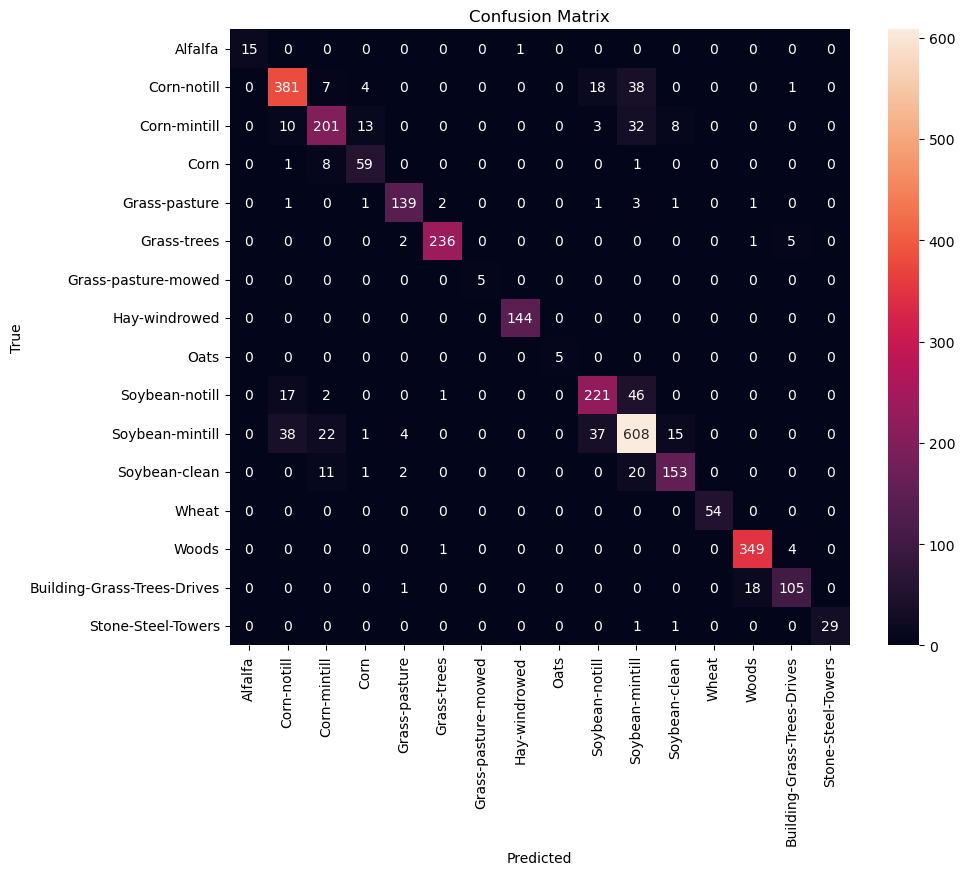

In [52]:
# confusion matrix
from sklearn.metrics import confusion_matrix

# Replace these with your actual ground truth and predicted labels
true_labels = y_test
predicted_labels = y_pred

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Define class labels (optional)
class_labels = ['Alfalfa','Corn-notill','Corn-mintill','Corn','Grass-pasture','Grass-trees','Grass-pasture-mowed','Hay-windrowed','Oats','Soybean-notill',
'Soybean-mintill','Soybean-clean','Wheat','Woods','Building-Grass-Trees-Drives','Stone-Steel-Towers']

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
# sns.set(font_scale=1.2)
# ns.set_style("whitegrid")
sns.heatmap(cm, annot=True, fmt="g", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ------------------------------------End-----------------------------------------

# Peformance Analysis

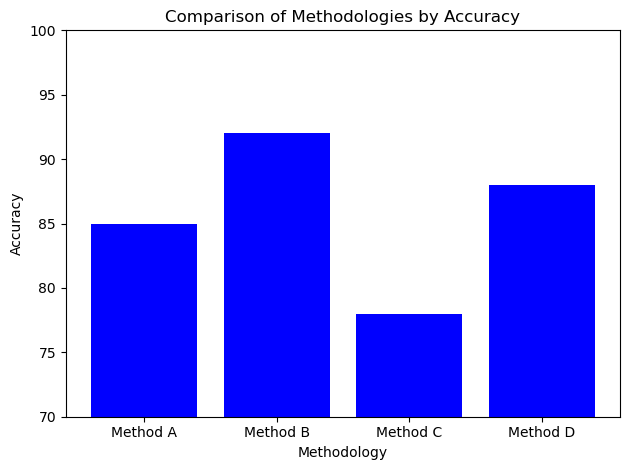

In [16]:
import matplotlib.pyplot as plt

# Methodologies and their corresponding accuracies
methodologies = ['Method A', 'Method B', 'Method C', 'Method D']
accuracies = [85, 92, 78, 88]

# Create a bar chart
plt.bar(methodologies, accuracies, color='blue')

# Add labels and title
plt.xlabel('Methodology')
plt.ylabel('Accuracy')
plt.title('Comparison of Methodologies by Accuracy')

plt.ylim(70, 100) 

# Show the bar chart
plt.tight_layout()
plt.show()

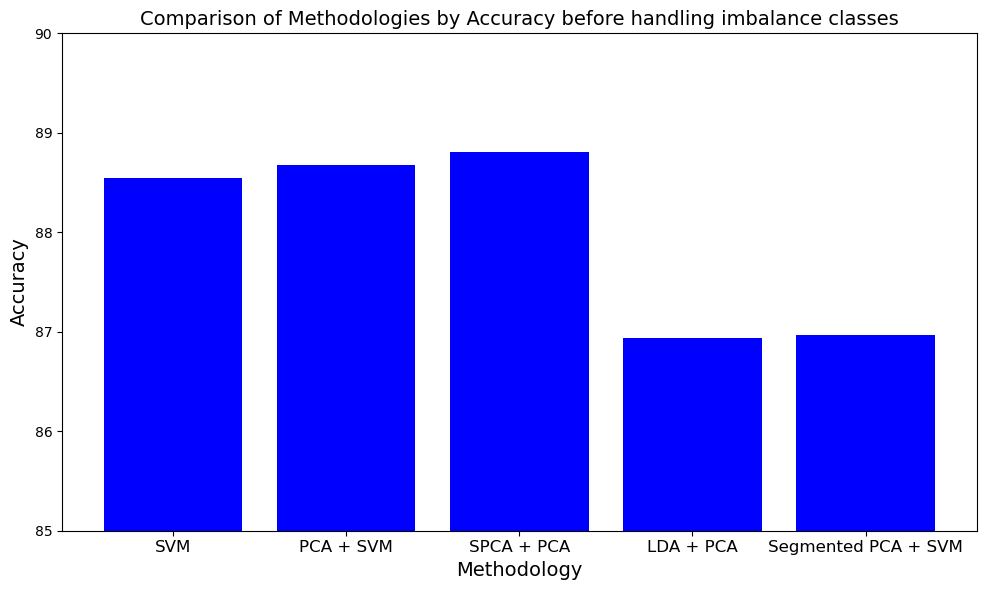

In [7]:
import matplotlib.pyplot as plt

# Methodologies and their corresponding accuracies
methodologies = ['SVM', 'PCA + SVM', 'SPCA + PCA', 'LDA + PCA', 'Segmented PCA + SVM']
accuracies = [88.55 , 88.68 , 88.81 , 86.94, 86.97]

plt.figure(figsize=(10,6))
# Create a bar chart
plt.bar(methodologies, accuracies, color='blue')

# Add labels and title
plt.xlabel('Methodology' , fontsize=14)
plt.xticks(fontsize=12)

plt.ylabel('Accuracy' , fontsize=14)
plt.title('Comparison of Methodologies by Accuracy before handling imbalance classes', fontsize=14)

plt.ylim(85, 90) 

# Show the bar chart
plt.tight_layout()
plt.show()

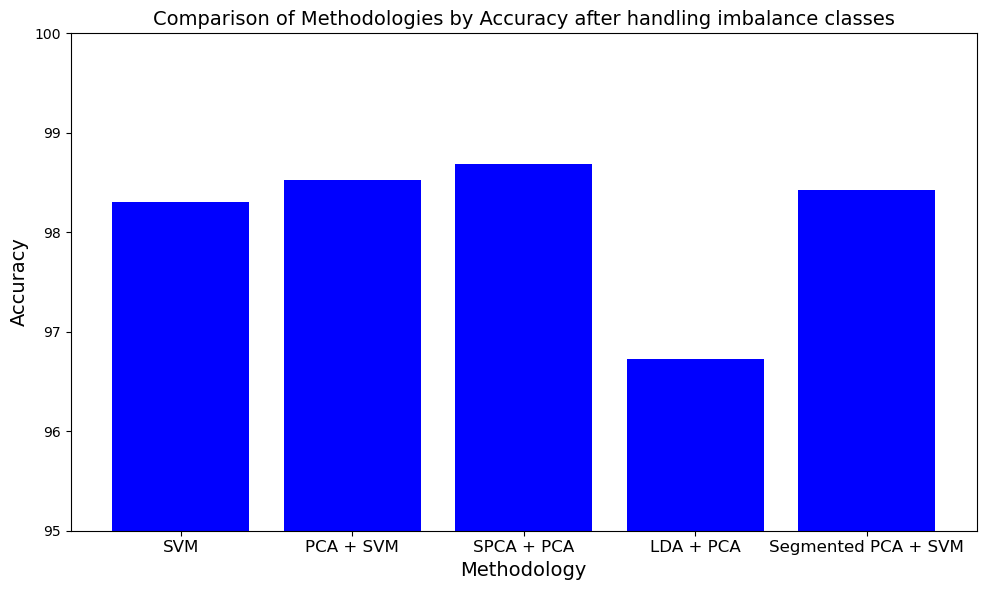

In [9]:
import matplotlib.pyplot as plt

# Methodologies and their corresponding accuracies
methodologies = ['SVM', 'PCA + SVM', 'SPCA + PCA', 'LDA + PCA', 'Segmented PCA + SVM']
accuracies = [98.3 , 98.53 , 98.69 , 96.73 , 98.43]

plt.figure(figsize=(10,6))
# Create a bar chart
plt.bar(methodologies, accuracies, color='blue')

# Add labels and title
plt.xlabel('Methodology' , fontsize=14)
plt.xticks(fontsize=12)

plt.ylabel('Accuracy' , fontsize=14)
plt.title('Comparison of Methodologies by Accuracy after handling imbalance classes', fontsize=14)

plt.ylim(95, 100) 

# Show the bar chart
plt.tight_layout()
plt.show()

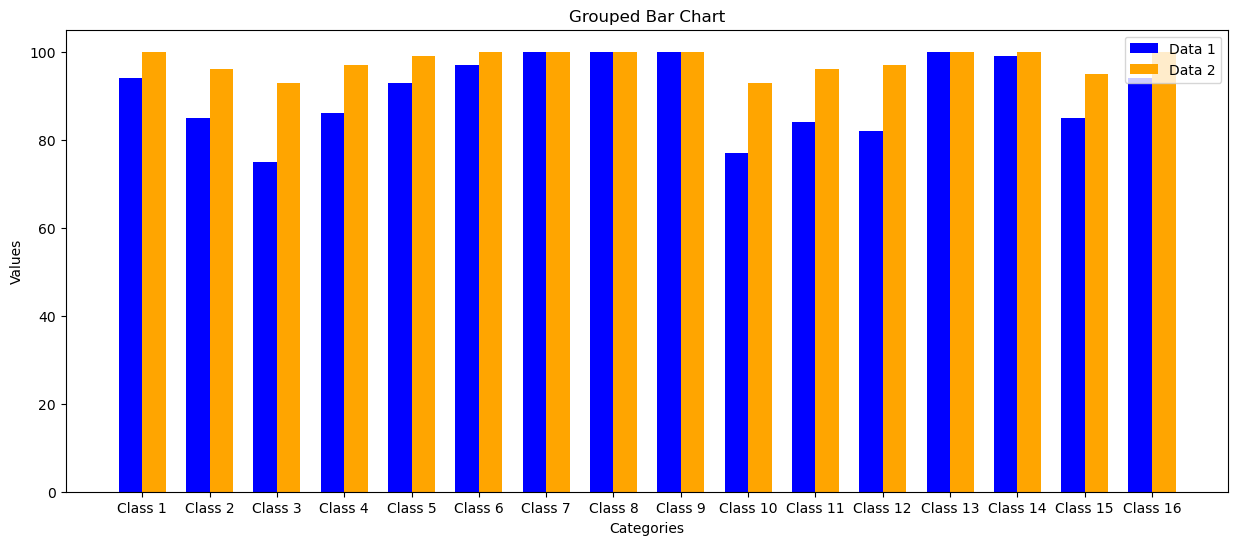

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data

categories = ['Class 1','Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10',
 'Class 11','Class 12','Class 13','Class 14','Class 15','Class 16']
data1 = [94,85,75,86,93,97,100,100,100,77,84,82,100,99,85,94]
data2 = [100,96,93,97,99,100,100,100,100,93,96,97,100,100,95,100]

# Set up positions for the bars
x = np.arange(len(categories))
width = 0.35

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the bars
ax.bar(x - width/2, data1, width, label='Data 1', color='blue')
ax.bar(x + width/2, data2, width, label='Data 2', color='orange')

# Customize the plot
ax.set_title('Grouped Bar Chart')
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Display the plot
plt.show()


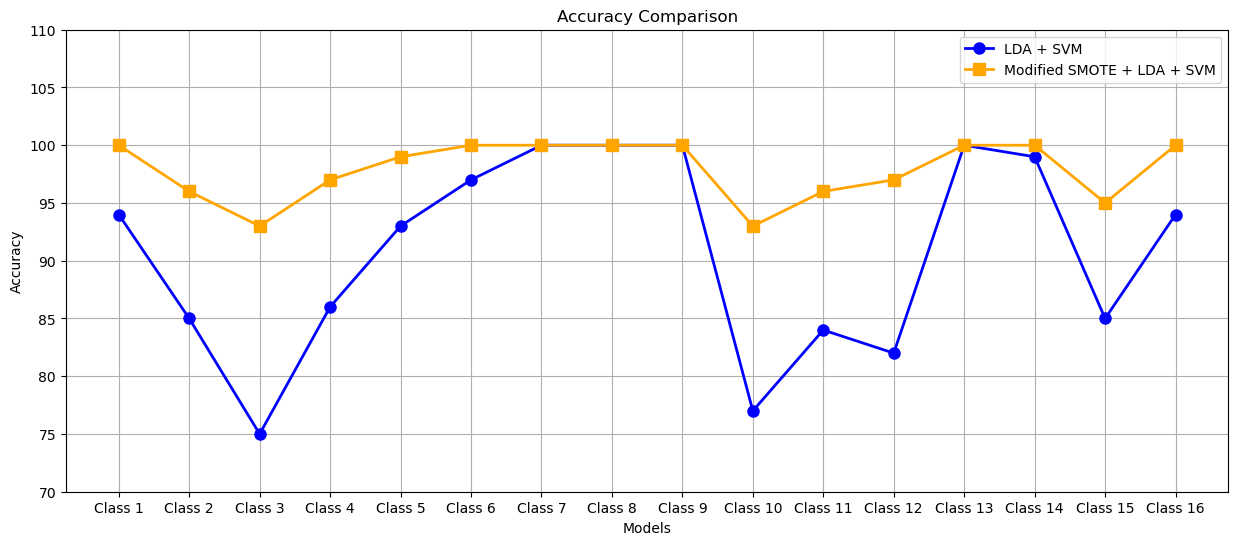

In [45]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Class 1','Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10',
 'Class 11','Class 12','Class 13','Class 14','Class 15','Class 16']
accuracies_1 = [94,85,75,86,93,97,100,100,100,77,84,82,100,99,85,94]
accuracies_2 = [100,96,93,97,99,100,100,100,100,93,96,97,100,100,95,100]

# Create a line graph with two lines
plt.figure(figsize=(15, 6))
plt.plot(categories, accuracies_1, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8, label='LDA + SVM')
plt.plot(categories, accuracies_2, marker='s', color='orange', linestyle='-', linewidth=2, markersize=8, label='Modified SMOTE + LDA + SVM')

# Customize the plot
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(70, 110)

# Display the plot
plt.show()


In [53]:
sorted(y_test.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [54]:
y_test.value_counts()

11    725
2     449
14    354
10    287
3     267
6     244
12    187
5     149
8     144
15    124
4      69
13     54
16     31
1      16
9       5
7       5
Name: target, dtype: int64

In [55]:
# classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred,labels=sorted(y_test.unique()))
print(report)

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        16
           2       0.85      0.85      0.85       449
           3       0.80      0.75      0.78       267
           4       0.75      0.86      0.80        69
           5       0.94      0.93      0.94       149
           6       0.98      0.97      0.98       244
           7       1.00      1.00      1.00         5
           8       0.99      1.00      1.00       144
           9       1.00      1.00      1.00         5
          10       0.79      0.77      0.78       287
          11       0.81      0.84      0.82       725
          12       0.86      0.82      0.84       187
          13       1.00      1.00      1.00        54
          14       0.95      0.99      0.97       354
          15       0.91      0.85      0.88       124
          16       1.00      0.94      0.97        31

    accuracy                           0.87      3110
   macro avg       0.91   

In [56]:
class_accuracies = {}
class_sample_counts = {}

# Calculate per-class accuracy and sample counts
for class_label in set(y_test):
    class_indices = y_test == class_label
    class_accuracy = accuracy_score(y_test[class_indices], y_pred[class_indices])
    class_sample_count = sum(class_indices)
    class_accuracies[class_label] = class_accuracy
    class_sample_counts[class_label] = class_sample_count

# Print per-class accuracies and sample counts
print("Per-Class Accuracies and Sample Counts:")
for class_label, class_accuracy in class_accuracies.items():
    class_samples = class_sample_counts[class_label]
    print(f"Class {class_label}: Accuracy = {class_accuracy:.2f}, Samples = {class_samples}")

Per-Class Accuracies and Sample Counts:
Class 1: Accuracy = 0.94, Samples = 16
Class 2: Accuracy = 0.85, Samples = 449
Class 3: Accuracy = 0.75, Samples = 267
Class 4: Accuracy = 0.86, Samples = 69
Class 5: Accuracy = 0.93, Samples = 149
Class 6: Accuracy = 0.97, Samples = 244
Class 7: Accuracy = 1.00, Samples = 5
Class 8: Accuracy = 1.00, Samples = 144
Class 9: Accuracy = 1.00, Samples = 5
Class 10: Accuracy = 0.77, Samples = 287
Class 11: Accuracy = 0.84, Samples = 725
Class 12: Accuracy = 0.82, Samples = 187
Class 13: Accuracy = 1.00, Samples = 54
Class 14: Accuracy = 0.99, Samples = 354
Class 15: Accuracy = 0.85, Samples = 124
Class 16: Accuracy = 0.94, Samples = 31
